In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path:
    sys.path.append(dir1)
os.chdir('..')

In [2]:
from hydra import compose, initialize

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocessing.gender_preprop import preprocessing

%load_ext autoreload
%autoreload 2

In [20]:
with initialize(config_path='../config', version_base=None):
    cfg = compose(config_name='config')
cfg_preprop = cfg['dataset']
cfg_model = cfg['autoencoder']

In [21]:
transactions_df = pd.read_csv('data/gender_data/transactions.csv')
gender_train = pd.read_csv('data/gender_data/gender_train.csv')

In [14]:
transactions_df['mcc_code'].nunique()

184

In [23]:
data_agg = preprocessing(cfg_preprop)

In [24]:
data_agg

,sample_label,customer_id,mcc_code,is_income,amount,target
0,0,1,"[1, 2, 3, 4, 4, 5, 4, 6, 4, 1, 5, 4, 7, 2, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.716870515786016, 10.935744381544225, 10.935...",1.0
1,1,1,"[5, 5, 9, 9, 9, 9, 7, 5, 6, 1, 9, 5, 1, 1, 10,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[8.491596370152388, 9.59174295228219, 8.746487...",1.0
2,2,1,"[4, 11, 4, 4, 4, 4, 4, 4, 5, 10, 10, 4, 2, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.9792327252429285, 6.330576154666125, 8.4100...",1.0
3,3,1,"[2, 1, 2, 1, 8, 1, 4, 1, 2, 2, 4, 1, 2, 5, 1, ...","[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[10.019453827771137, 8.122332655544211, 9.6627...",1.0
4,4,1,"[5, 4, 4, 1, 4, 4, 9, 2, 4, 2, 1, 2, 4, 1, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[9.630845805207086, 6.545680065514731, 7.38836...",1.0
...,...,...,...,...,...,...
152058,159118,8400,"[38, 4, 36, 10, 10, 4, 9, 2, 18, 10, 4, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[9.218721154901491, 8.937697967932115, 10.2970...",0.0
152059,159119,8400,"[10, 38, 4, 11, 2, 38, 10, 8, 3, 8, 1, 18, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[7.325307048225448, 9.828292990257117, 7.94001...",0.0
152060,159120,8400,"[2, 2, 4, 11, 11, 11, 5, 11, 168, 57, 4, 11, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[11.118065968021694, 11.084164503349408, 8.053...",0.0
152061,159121,8400,"[10, 10, 11, 11, 5, 168, 1, 10, 4, 168, 4, 11,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[9.26655623063942, 5.676651057264167, 7.316388...",0.0


In [27]:
data_agg['mcc_code'].iloc[0][1]

'1'

In [16]:
transactions_df.join(gender_train.set_index('customer_id'), how='inner', on='customer_id')['gender'].value_counts()

gender
0    1962190
1    1788893
Name: count, dtype: int64

In [34]:
x = transactions_df[(transactions_df['amount'] < 0) & (transactions_df['amount'] > -100)]['amount'].values
x.min()

-99.94

<BarContainer object of 10000 artists>

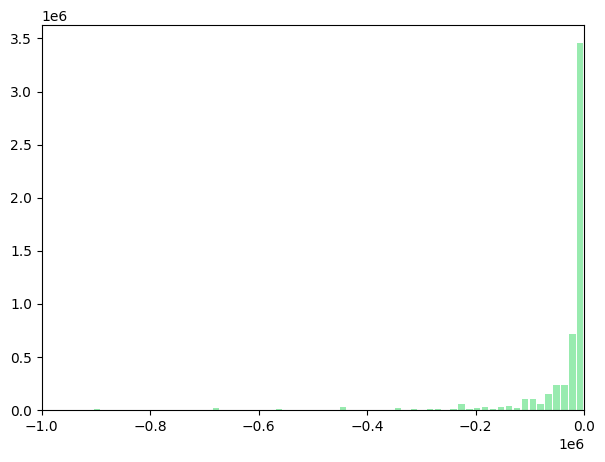

In [43]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = transactions_df[(transactions_df['amount'] < 0)]['amount'].values
# Get histogram
hist, bins = np.histogram(x, bins=10000)

# Threshold frequency
# freq = 0 #500

# # Zero out low values
# hist[np.where(hist <= freq)] = 0

# Plot
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.xlim([-1e6, 0])
#plt.margins(0.05)
plt.bar(center, hist, align='center', width=width, color = '#33D860', label='normal', alpha=0.5)#'#7eb54e')

In [7]:
mcc_codes_df = pd.read_csv('data/gender_data/tr_mcc_codes.csv', sep=';')

In [8]:
mcc_codes_df

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


In [9]:
gender_train_df = pd.read_csv('data/gender_data/gender_train.csv')

In [10]:
gender_train_df

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1
...,...,...
8395,90417572,0
8396,66837341,0
8397,10758984,1
8398,11376556,0
